###Imports and Info

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


file = '/content/drive/MyDrive/The Museum of Edible Earth/clean_dirt_final.csv'
df = pd.read_csv(file)
df.head()

,index,Name,Country,Composition,Shape,Color,Acq Date,OG_Date,Acq Method,Edibility,Tags,Taste,Texture,Acq Year,Acq Month
0,0,SatinAr Clay,Armenia,Clay,Powder,Brown,2021-09-19,2021-09-19,Present,Eaten,NaN,NaN,NaN,2021.0,September
1,1,SatinAr Clay,Armenia,Clay,Powder,Brown,2023-08-01,NaN,Private seller,Eaten,NaN,NaN,NaN,2023.0,NaN
2,2,Schindele's Mineralen,Austria,Clay,Powder,Brown,2022-02-02,2022-02-02,Present,Eaten,"calcium, chemical, creamy, fine, iron, mineral...","Metallic, Chemical, Milky, Earthy, Experience,...","Chalky, Creamy, Powdery, Hard, Dry, Experience...",2022.0,February
3,3,Basic Detox Plus,Austria,Other,Powder,Grey,2022-05-31,2022-05-31,Shop,Eaten,NaN,NaN,NaN,2022.0,May
4,4,taste your soil: ars electronica,Austria,Sand,Powder,Brown,2021-09-12,2021-09-12,Project,Not Eaten,NaN,NaN,NaN,2021.0,September


###Date and Acquisition

**In this section, the following questions will be answered:**

- What are the most and least frequent Acquisition Years and Months?

- Were there any Years where a specific Country was focused on?

- What are the most common acquisition channels?

In [4]:
df['Acq Year'] = df['Acq Year'].astype('Int64')
counts = df['Acq Year'].value_counts().reset_index()
countsy = counts.sort_values(by = 'count', ascending = False)
countsy

,Acq Year,count
0,2017,147
1,2019,121
2,2021,113
3,2020,109
4,2016,47
5,2022,46
6,2024,26
7,2018,12
8,2013,10
9,2015,10


In [5]:
countsm = df['Acq Month'].value_counts().reset_index()
countsm = countsm.sort_values(by = 'count', ascending = False)
countsm

,Acq Month,count
0,June,151
1,July,53
2,October,46
3,May,43
4,November,36
5,September,32
6,April,32
7,August,30
8,January,29
9,December,23


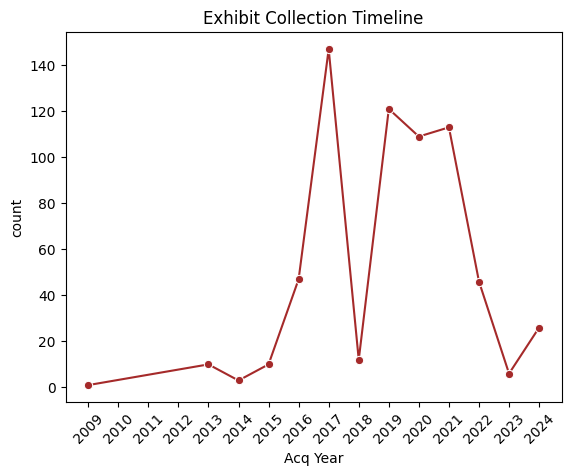

In [6]:
labels = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
sns.lineplot(data = countsy, x = 'Acq Year', y = 'count', marker = 'o', color = 'brown')
plt.title('Exhibit Collection Timeline')
plt.xticks(rotation = 45, ticks = labels, labels = labels)
plt.show()

**Observations:**

- The samples in the dataset have been collected from 2009 to 2024.

- There is a 3 year sample collection gap between 2009 and 2013 near the beginning of the exhibits life cycle. Things don't begin to pick up until 2016.

- The highest years for collection were 2017, 19, 20 and 21.

- 2018 was a surprisingly steep drop off in sample collection.

- The lowest years for sample collection were 2009, 2013, 2014, 2015 and 2023.

- The highest number of samples collected in 1 year was 147 in 2017.

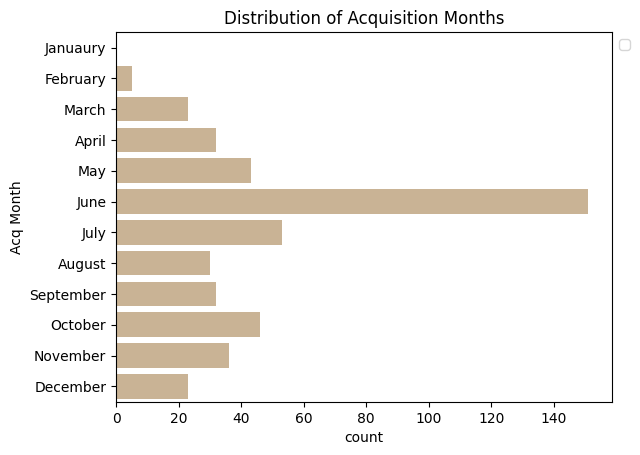

In [7]:
ticks = ['Januaury', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data = df, y = 'Acq Month', order = ticks, color = 'tan')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Distribution of Acquisition Months')
plt.show()

**Observation:**

- So for some reason, an absolutely overwhelming number of samples are collected in the month of June compared to any other month during the overall time span of the exhibit. A majority of these come from the top years as well.

In [8]:
top = df['Country'].value_counts().reset_index(name = 'Count').nlargest(20, 'Count')
top20 = df[df['Country'].isin(top['Country'])]

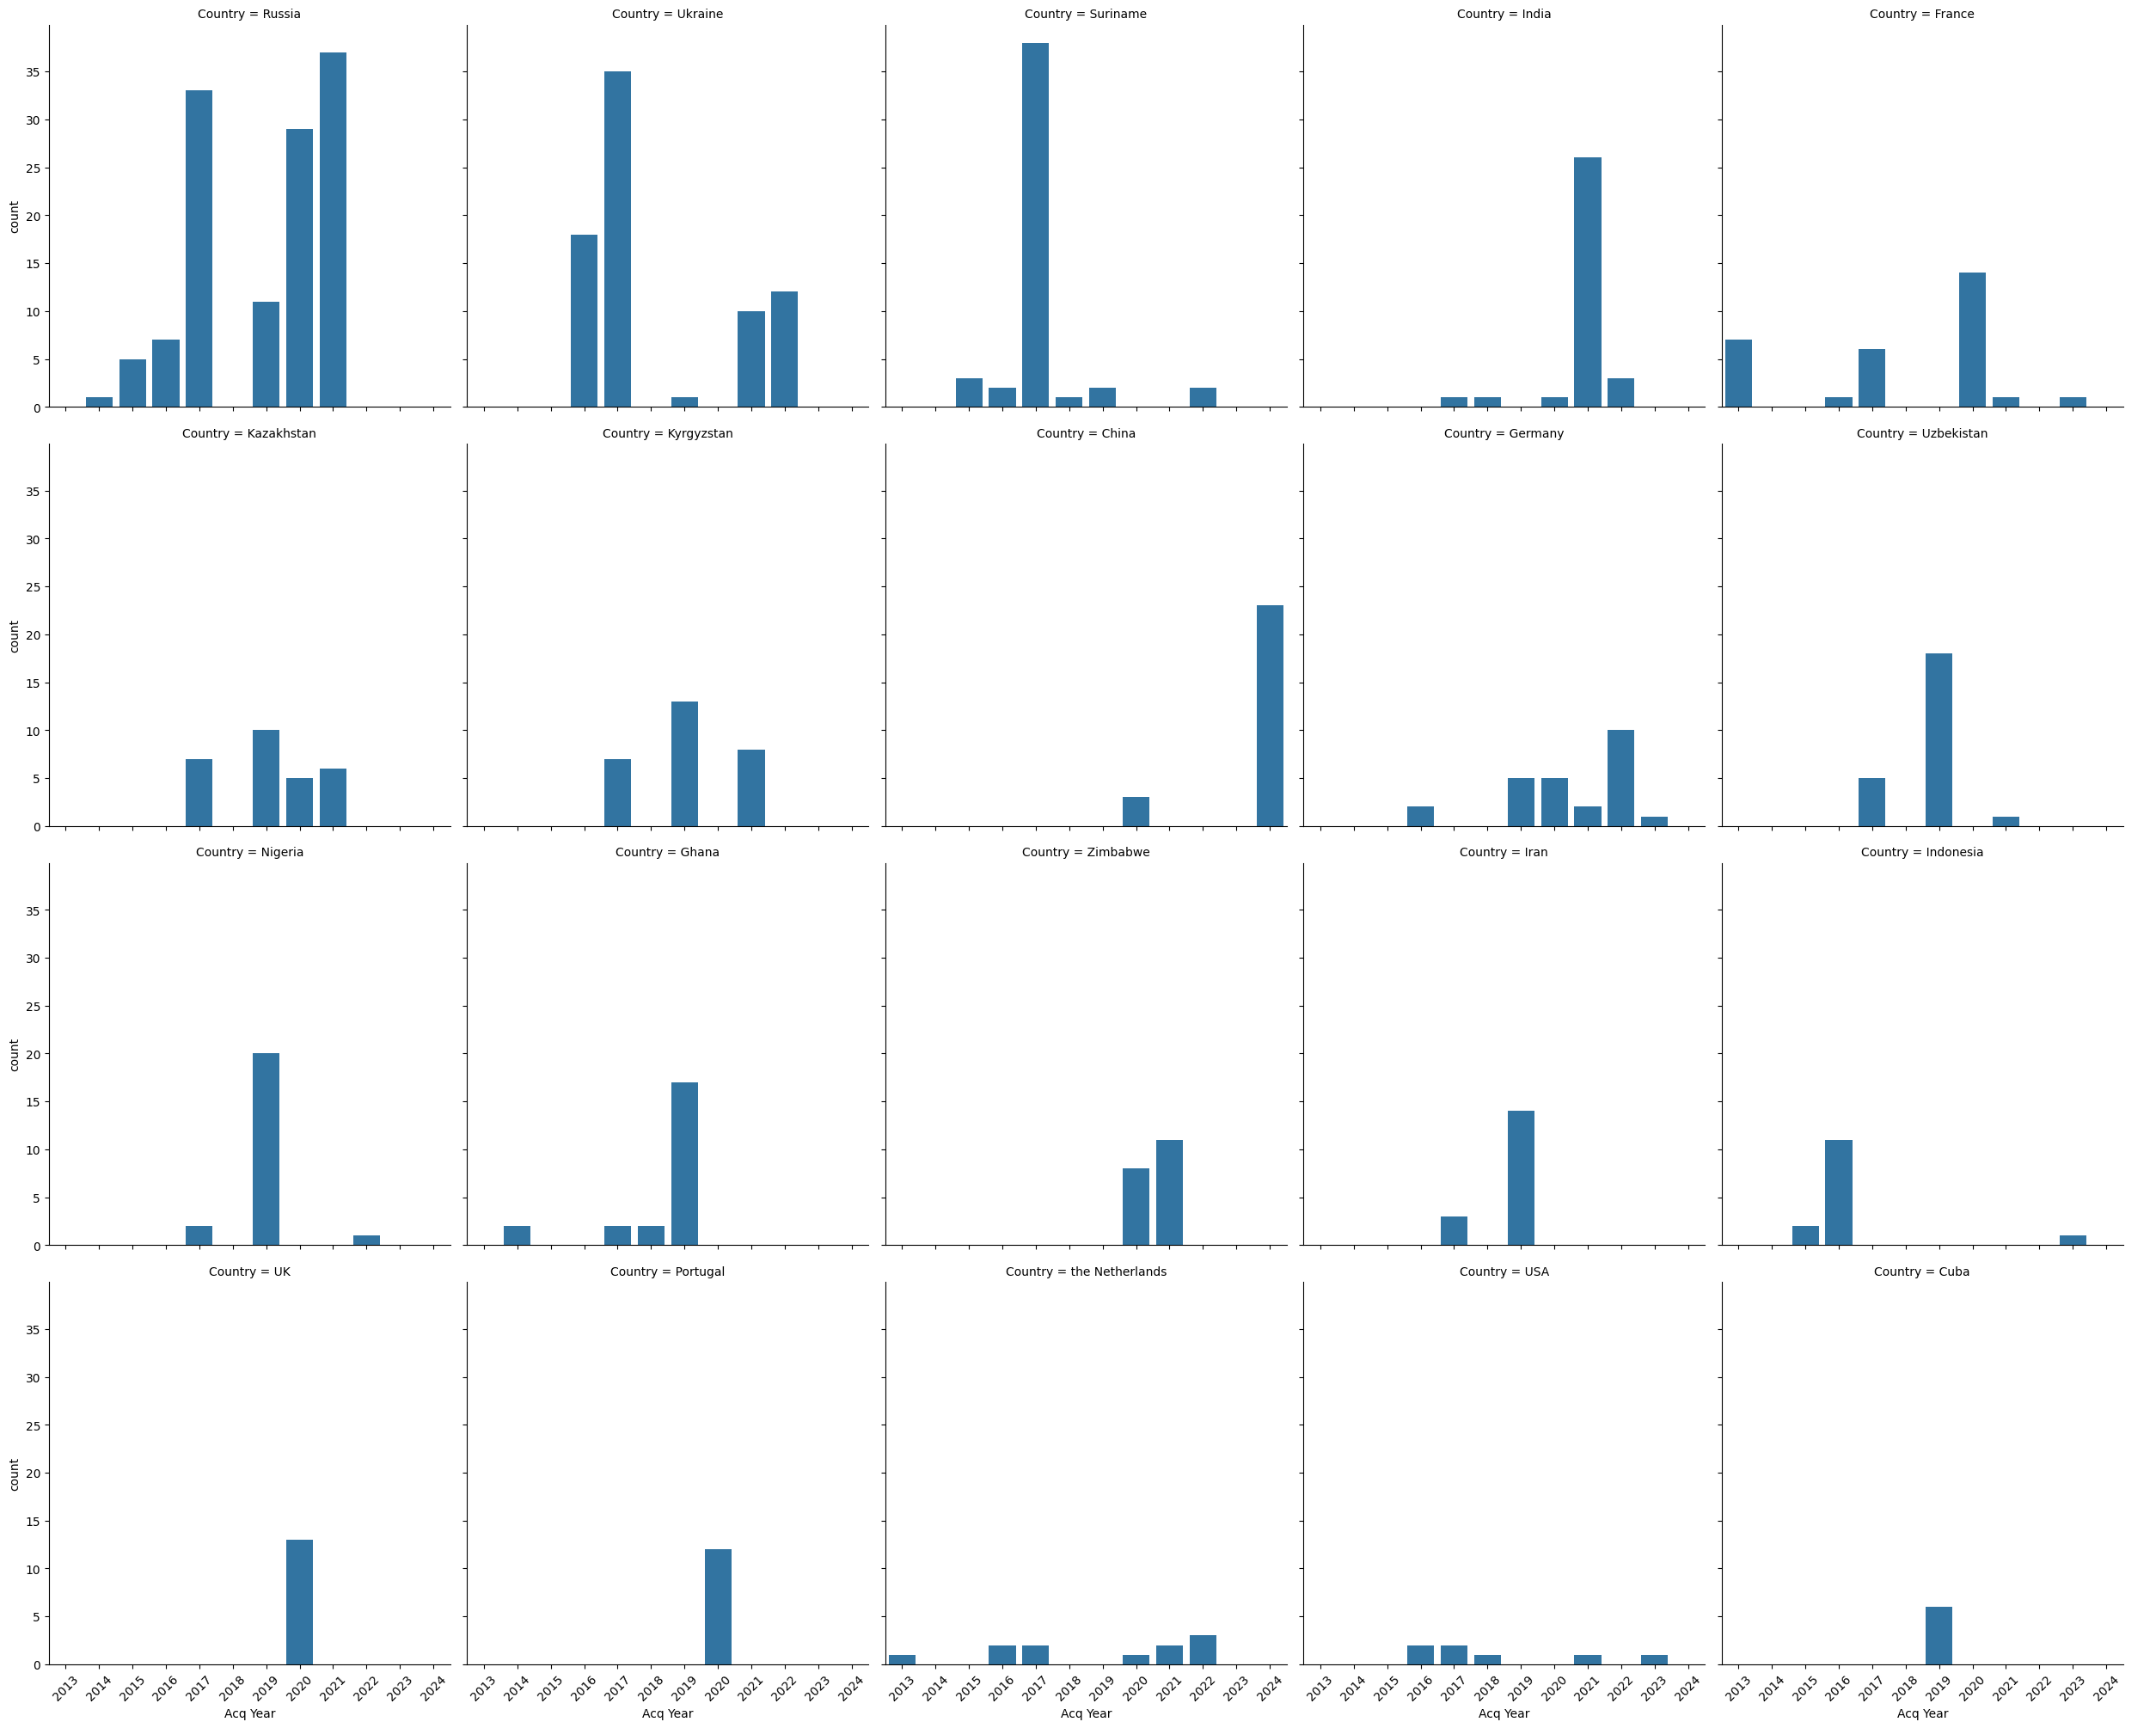

In [9]:
col_order = (top20['Country'].value_counts().sort_values(ascending = False).index)

ax = sns.catplot(data = top20, kind = 'count', col = 'Country', x = 'Acq Year', col_wrap = 5, col_order = col_order)
ax.tick_params(axis='x', labelrotation=45)

**Observations:**

- The top countries for the top years were Suriname in 2017, Nigeria in 2019, and Russia in 2020 and 2021.

- The highest number of samples collected in 1 year in 1 country was 38 in Suriname during 2017 (Surprisingly not Russia).

- In 2024, all of the minerals were collected from China, and it was a respectable number of minerals.

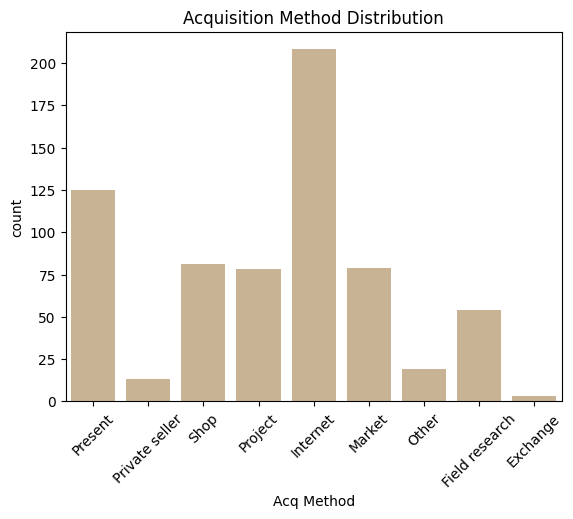

In [10]:
sns.countplot(x = 'Acq Method', color = 'tan', data = df)
plt.xticks(rotation = 45)
plt.title('Acquisition Method Distribution')
plt.show()

**Observation:**

- The most popular Acquisition Method by far is by Internet channels. Present is barely a close second, and the rest of the distribution channels are pretty evenly distributed.

###Shape, Color and Comoposition

**In this section, the following question will be answered:**

- What are the distributions of Shape, Color and Composition?

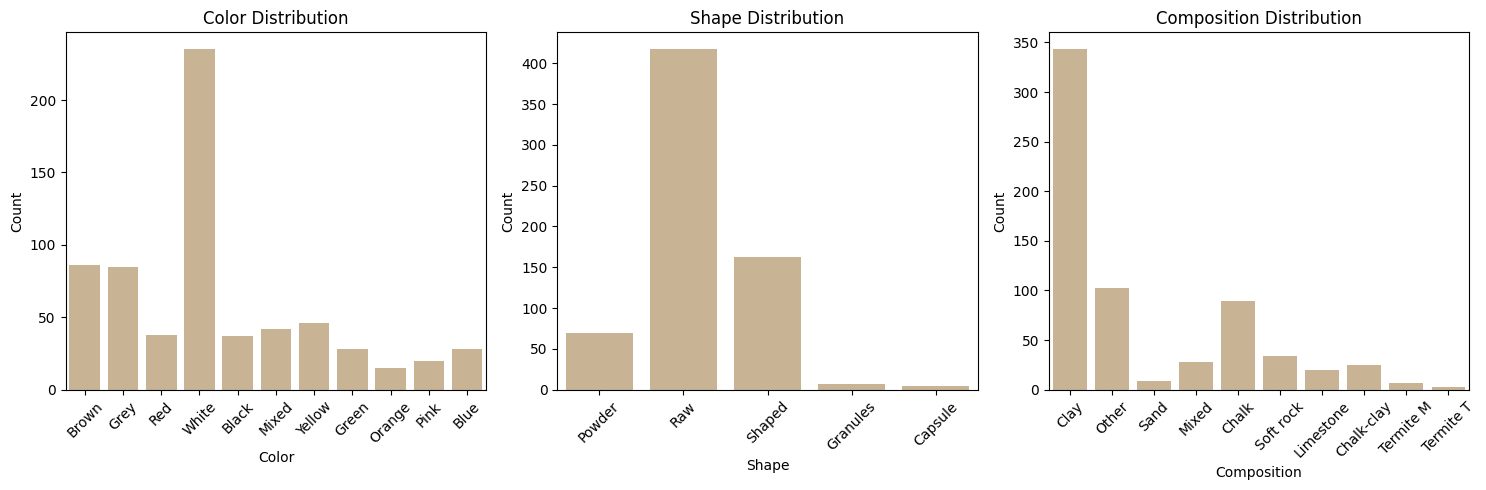

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 5))

ax[0] = sns.countplot(data = df, x = 'Color', color = 'tan', ax = ax[0])
ax[0].set_title('Color Distribution')
ax[0].set_xlabel('Color')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', labelrotation=45)

ax[1] = sns.countplot(data = df, x ='Shape', color = 'tan', ax = ax[1])
ax[1].set_title('Shape Distribution')
ax[1].set_xlabel('Shape')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', labelrotation=45)

ax[2] = sns.countplot(data = df, x = 'Composition', color = 'tan', ax = ax[2])
ax[2].set_title('Composition Distribution')
ax[2].set_xlabel('Composition')
ax[2].set_ylabel('Count')
ax[2].tick_params(axis='x', labelrotation=45)

plt.tight_layout()

plt.show()

**Observations:**

- The most common color is White.

- The most common Shape is Raw.

- The most common Composition is Clay.

- The top contributors of thes earth qualities take up most of the distribution.

###Taste and Texture

**In this section, the following questions will be answered:**

- What are the most common Tastes and Textures?

- Does Country affect Taste and Texture? (Maybe not needed)

In [11]:
df_exploded1 = df.assign(Taste = df['Taste'].str.split(',')).explode('Taste')
df_exploded1['Taste'] = df_exploded1['Taste'].str.strip()
df_exploded1['Taste'] = df_exploded1['Taste'].replace('N/A', np.nan)
df_exploded1['Taste'].unique()

array([nan, 'Metallic', 'Chemical', 'Milky', 'Earthy', 'Experience',
       'Sour', 'Sweet', 'Smoky', 'Tasty', 'Herbal', 'Bitter', 'Fruity',
       'Tangy', 'Salty', 'Umami', 'Rich', 'Savoury', 'Spicy',
       'Unpleasant', 'Nutty', 'Chocolatey'], dtype=object)

In [12]:
df_exploded2 = df.assign(Texture = df['Texture'].str.split(',')).explode('Texture')
df_exploded2['Texture'] = df_exploded2['Texture'].str.strip()
df_exploded2['Texture'] = df_exploded2['Texture'].replace('N/A', np.nan)
df_exploded2['Texture'].unique()

array([nan, 'Chalky', 'Creamy', 'Powdery', 'Hard', 'Dry', 'Experience',
       'Soft', 'Sticky', 'Airy', 'Flaky', 'Crunchy', 'Damp', 'Dusty',
       'Crispy', 'Grainy', 'Chewy', 'Dense', 'Smooth', 'Melty', 'Fizzy',
       'Pasty', 'Gooey'], dtype=object)

In [13]:
taste_counts = df_exploded1['Taste'].value_counts().reset_index()
texture_counts = df_exploded2['Texture'].value_counts().reset_index()

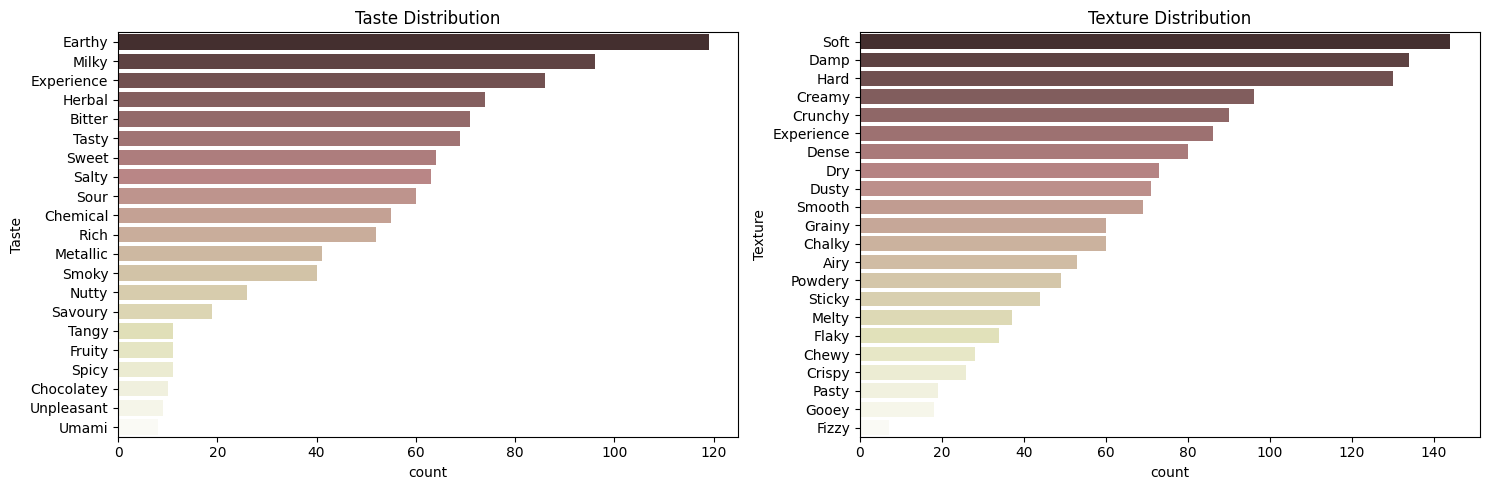

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

ax[0] = sns.barplot(data = taste_counts, x = 'count', y = 'Taste', palette = 'pink', ax = ax[0])
ax[0].set_title('Taste Distribution')

ax[1] = sns.barplot(data = texture_counts, x = 'count', y = 'Texture', palette = 'pink', ax = ax[1])
ax[1].set_title('Texture Distribution')

plt.tight_layout()
plt.show()

**Observations:**

- The most common Tastes are Earthy, Milky, Herbal, Bitter, and Sweet.

- The least common Tastes are Umami, Chocolately, Spicy, Fruity and Tangy.

- There are a lot more people who think the earth tastes good (Tasty) as opposed to bad (Unpleasant).

- The most common Textures are Soft, Damp, Hard, Creamy and Crunchy.

- The least common Textures are Fizzy, Gooey, Pasty, Crispy and Chewy.

- There were more people describing 'Experience' as opposed to Taste and Texture than I thought.

- The distribution for Taste and Texture is fairly balanced. There are no sharp dropoffs and no overwhelmingly high outliers.

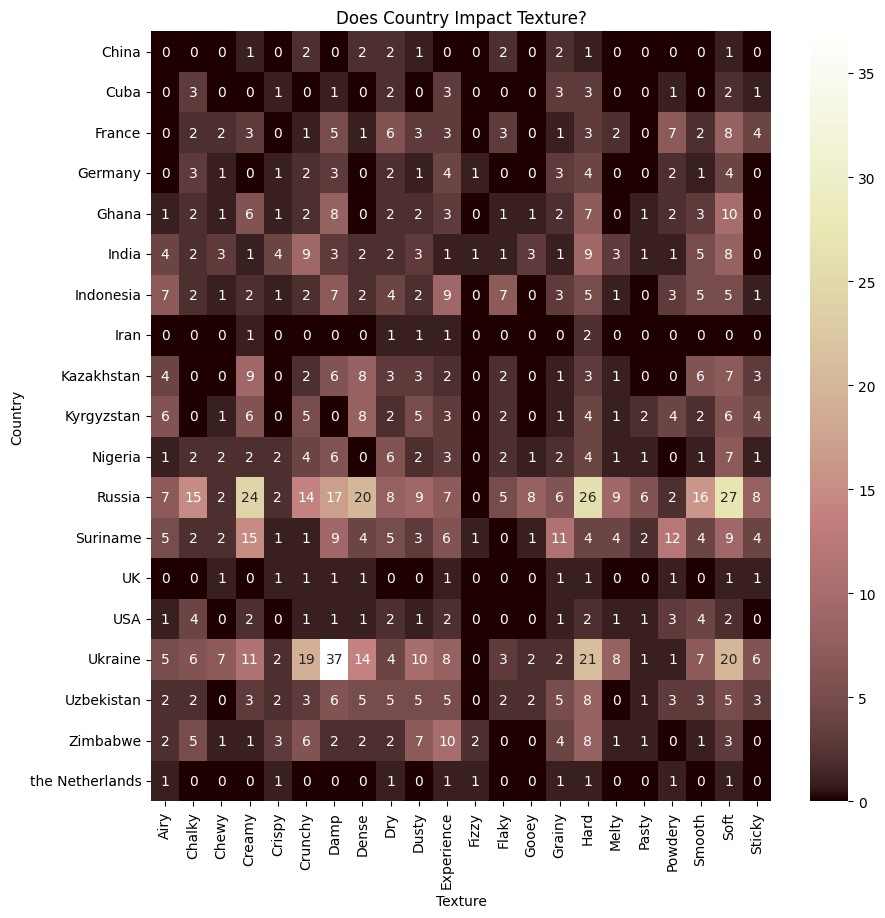

In [15]:
counts = df_exploded2[df_exploded2['Country'].isin(top20['Country'])]
cross11 = pd.crosstab(counts['Country'], counts['Texture'])
plt.figure(figsize = (10,10))
sns.heatmap(data = cross11, annot = True, fmt = 'd', cmap = 'pink')
plt.title('Does Country Impact Texture?')
plt.show()

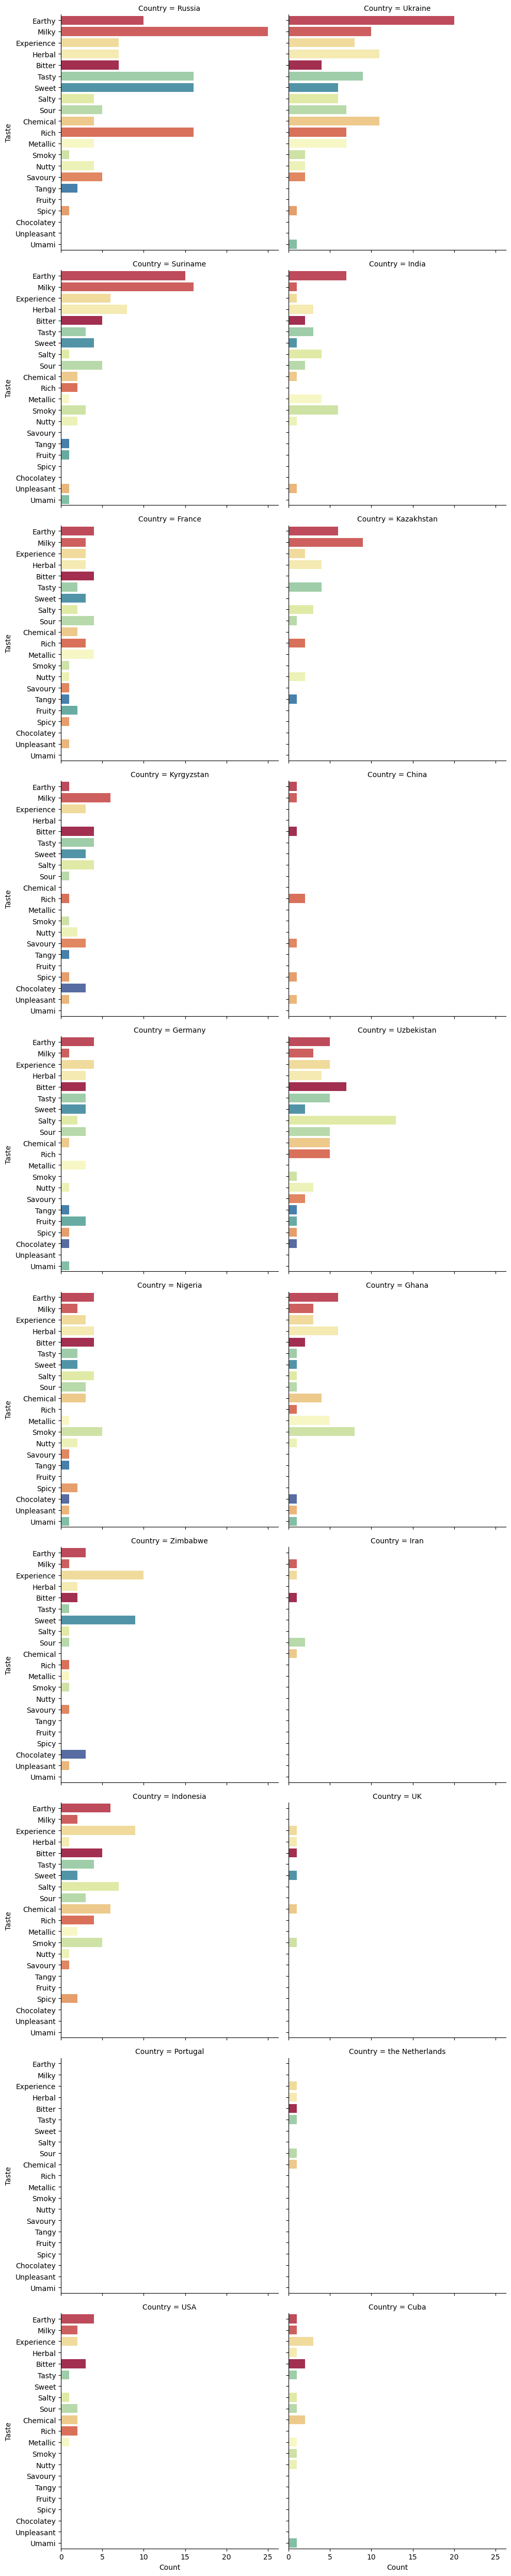

In [16]:
order = (df_exploded1['Taste'].value_counts().sort_values(ascending = False).index)
counts = df_exploded1[df_exploded1['Country'].isin(top20['Country'])]
counts = counts.groupby(['Country', 'Taste']).size().reset_index(name='Count')

ax = sns.catplot(data=counts,
                 x = 'Count',
                 y = 'Taste',
                 col = 'Country',
                 kind = 'bar',
                 col_wrap = 2,
                 hue = 'Taste',
                 palette = 'Spectral',
                 col_order = col_order,
                 order = order)

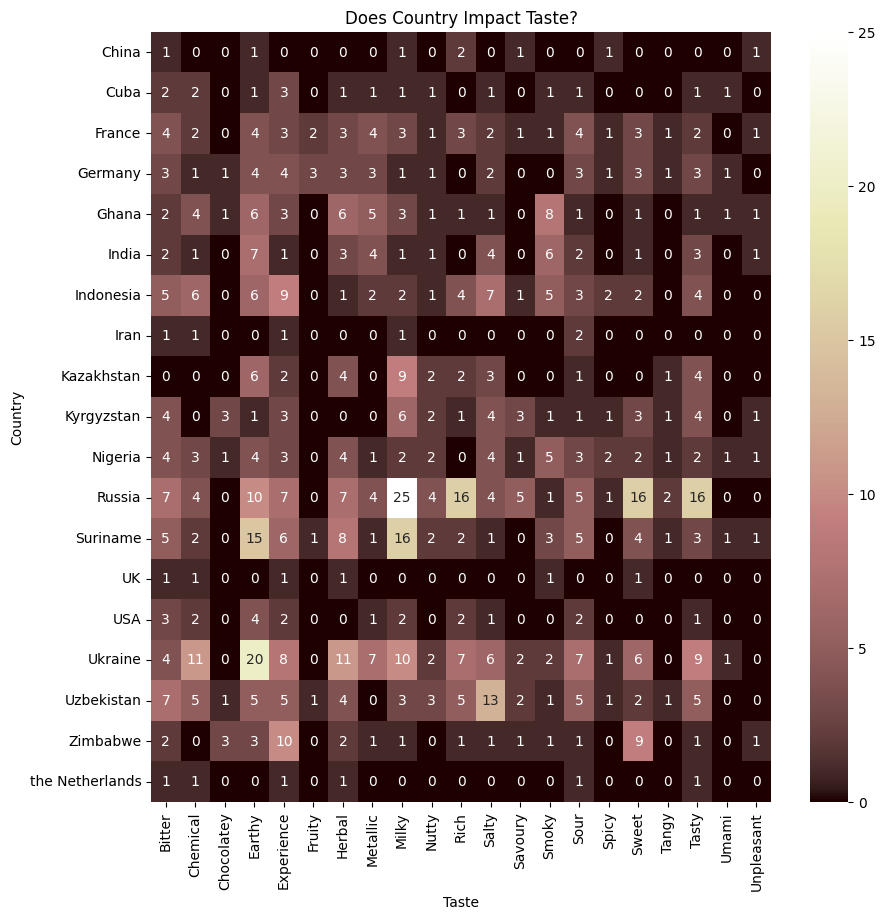

In [17]:
counts = df_exploded1[df_exploded1['Country'].isin(top20['Country'])]
cross12 = pd.crosstab(counts['Country'], counts['Taste'])
plt.figure(figsize = (10,10))
sns.heatmap(data = cross12, annot = True, fmt = 'd', cmap = 'pink')
plt.title('Does Country Impact Taste?')
plt.show()

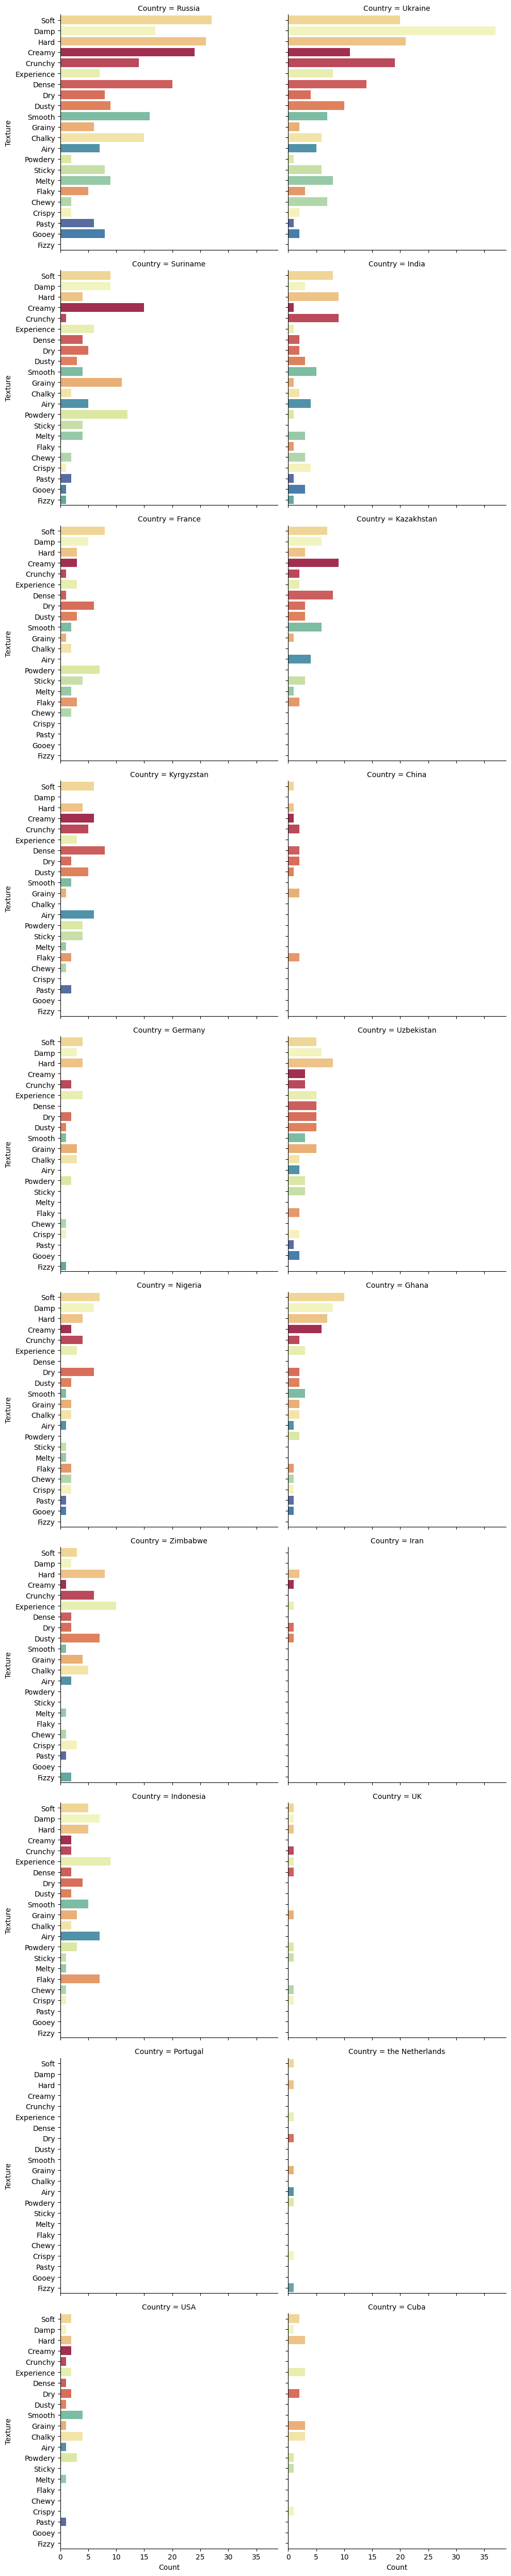

In [ ]:
order = (df_exploded2['Texture'].value_counts().sort_values(ascending = False).index)
counts = df_exploded2[df_exploded2['Country'].isin(top20['Country'])]
counts = counts.groupby(['Country', 'Texture']).size().reset_index(name='Count')

ax = sns.catplot(data=counts,
                 x = 'Count',
                 y = 'Texture',
                 col = 'Country',
                 kind = 'bar',
                 col_wrap = 2,
                 hue = 'Texture',
                 palette = 'Spectral',
                 col_order = col_order,
                 order = order)

**Observations:**

- Most of the countries in the top 20 (Where most of the data is) have a pretty wide variety of mineral Tastes and Textures. However, there are no countries whose high Taste or Texture counts exceed the top 5. Everything is skewed upward. Below, I will list the top combinations for each Taste and Texture

- **Country + Texture**

Russia, Sticky

Russia, Soft

Russia, Smooth

Suriname, Powdery

Russia, Pasty

Russia, Melty

Russia, Hard

Suriname, Grainy

Russia, Gooey

Indonseia, Flaky

Zimbabwe, Fizzy

Ukraine, Dusty

Russia, Dry

Russia, Dense

Ukraine, Damp

Ukraine, Crunchy

India, Crispy

Russia, Creamy

Ukraine, Chewy

Russia, Chalky

Indonesia/Russia, Airy

- **Country + Taste**

Insufficient Data, Umami

Insufficient Data, Tangy

Russia, Sweet

Indonesia, Spicy

Ukraine, Sour

Ghana, Smoky

Russia, Savoury

Uzbekistan, Salty

Russia, Rich

Russia, Nutty

Russia, Milky

Ukraine, Metallic

Ukraine, Herbal

Germany, Fruity

Ukraine, Earthy

Zimbabwe/Kyrgyzstan, Chocolatey

Ukraine, Chemical

Russia/Ukraine, Bitter

- Russia and Ukraine take up a majority of real estate due to their prevalance in the data. Throughout this dataset, there was only one major exception: In Uzbekistan, there were a lot of Salty samples. The other exceptions are small/negligible.

###Combination Comparison

**The following question will be answered in this section:**

- What are the most common Earth Quality Combinations?

- What are the most common Taste and Texture combinations?

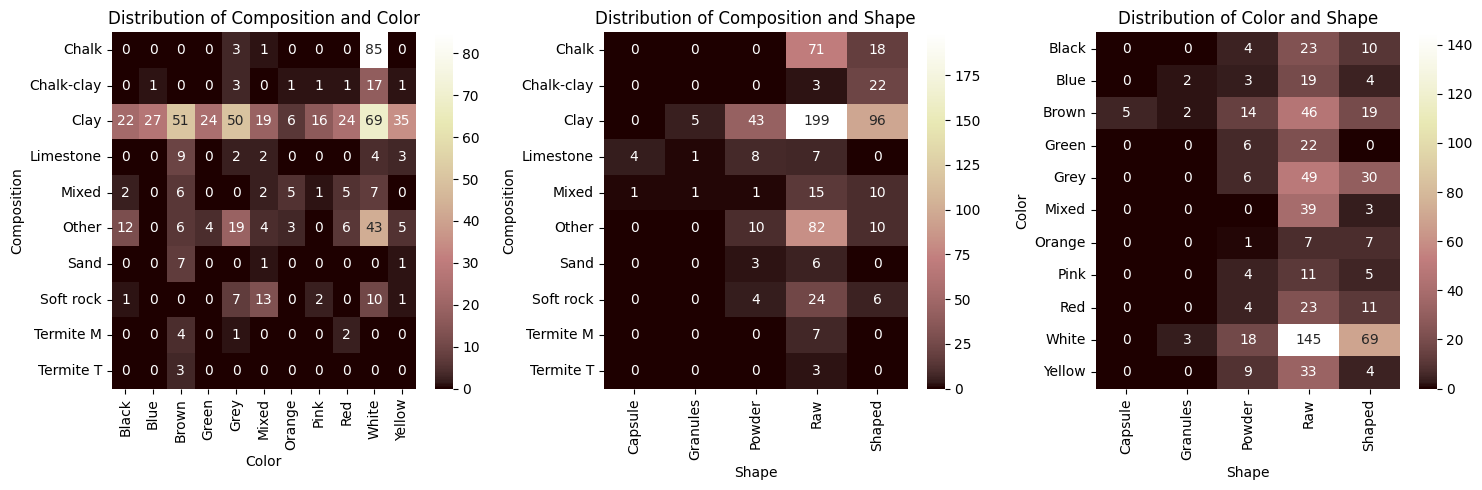

In [18]:

cross = pd.crosstab(df['Composition'], df['Color'])
cross2 = pd.crosstab(df['Composition'], df['Shape'])
cross3 = pd.crosstab(df['Color'], df['Shape'])

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 5))

ax[0] = sns.heatmap(data = cross, annot = True, fmt = 'd', cmap = 'pink', ax = ax[0])
ax[0].set_title('Distribution of Composition and Color')
ax[0].set_xlabel('Color')
ax[0].set_ylabel('Composition')

ax[1] = sns.heatmap(data = cross2, annot = True, fmt = 'd', cmap = 'pink', ax = ax[1])
ax[1].set_title('Distribution of Composition and Shape')
ax[1].set_xlabel('Shape')
ax[1].set_ylabel('Composition')

ax[2] = sns.heatmap(data = cross3, annot = True, fmt = 'd', cmap = 'pink', ax = ax[2])
ax[2].set_title('Distribution of Color and Shape')
ax[2].set_xlabel('Shape')
ax[2].set_ylabel('Color')

plt.tight_layout()

plt.show()

**Observations:**

- The most common combinations of shape and color are: [Raw , White], [Shaped, White], [Raw , Grey] and [Raw, Brown].

- The most common combinations of composition and shape are: [Raw, Clay], [Shaped, Clay], [Raw, Other] and [Raw, Chalk].

- The most common combinations of composition and color are: [Chalk + White], [Clay + White], [Clay + Brown], [Clay + Grey] and [Clay + Other]. It's interesting how even though clay is the most common composition, the number of [Chalk + White] minerals are more present than any of the clay combinations.

- Generally, the most common combinations align with the most common attributes except for the [Chalk + White] items mentioned above.

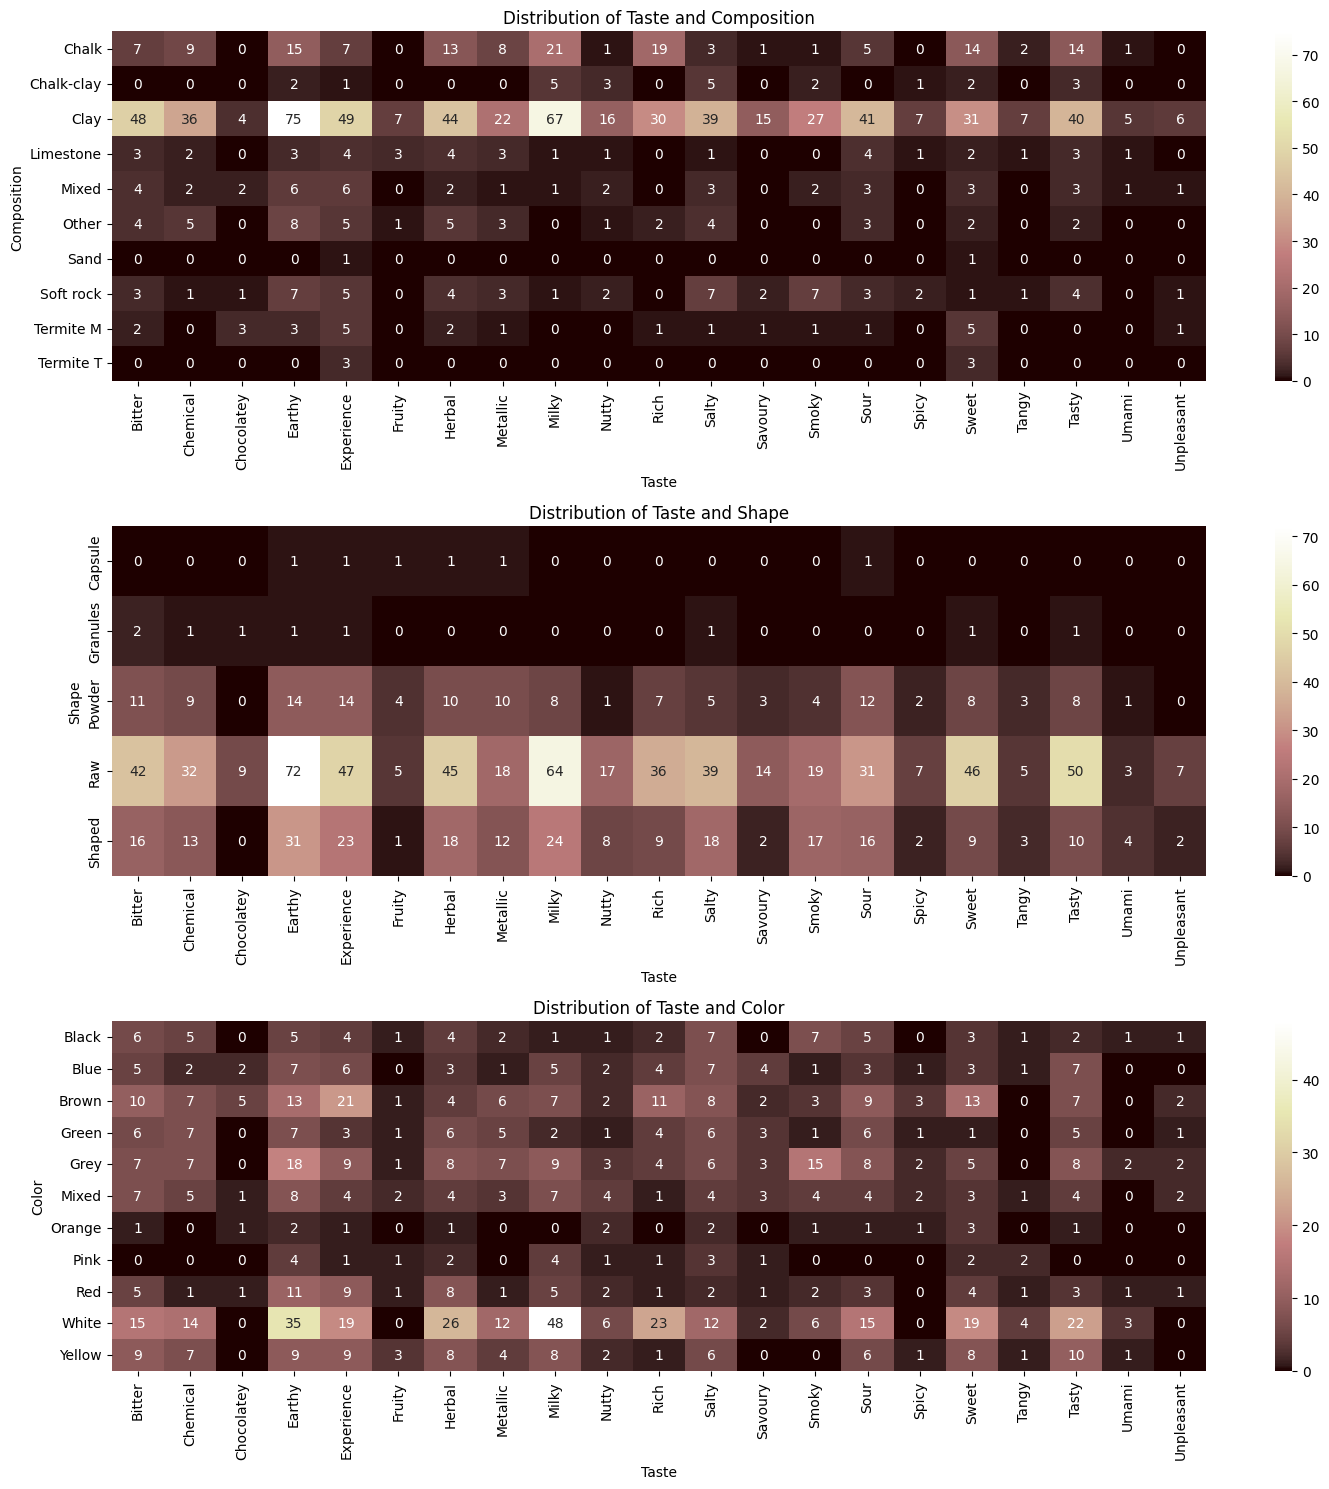

In [ ]:
cross4 = pd.crosstab(df_exploded1['Composition'], df_exploded1['Taste'])
cross5 = pd.crosstab(df_exploded1['Shape'], df_exploded1['Taste'])
cross6 = pd.crosstab(df_exploded1['Color'], df_exploded1['Taste'])

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(15, 15))

ax[0] = sns.heatmap(data = cross4, annot = True, fmt = 'd', cmap = 'pink', ax = ax[0])
ax[0].set_title('Distribution of Taste and Composition')

ax[1] = sns.heatmap(data = cross5, annot = True, fmt = 'd', cmap = 'pink', ax = ax[1])
ax[1].set_title('Distribution of Taste and Shape')

ax[2] = sns.heatmap(data = cross6, annot = True, fmt = 'd', cmap = 'pink', ax = ax[2])
ax[2].set_title('Distribution of Taste and Color')

plt.tight_layout()

plt.show()

**Observations:**

- There does not seem to be any relationship between Composition/Shape/Color and Taste. Most of the distribution is skewed towards the most common tastes and earth qualities, and none of the outlying combinations come close. Taste and Color seem more evenly distributed due to having more variables at a glance, but it is still skewed. The following are the top 3 combinations for each heatmap:

- Taste/Composition:[Clay, Earthy], [Clay, Milky], [Clay, Experience]

- Taste/Shape: [Raw, Earthy], [Raw, Milky], [Raw, Tasty]

- Taste/Color: [White, Milky], [White, Earthy], [White, Herbal]

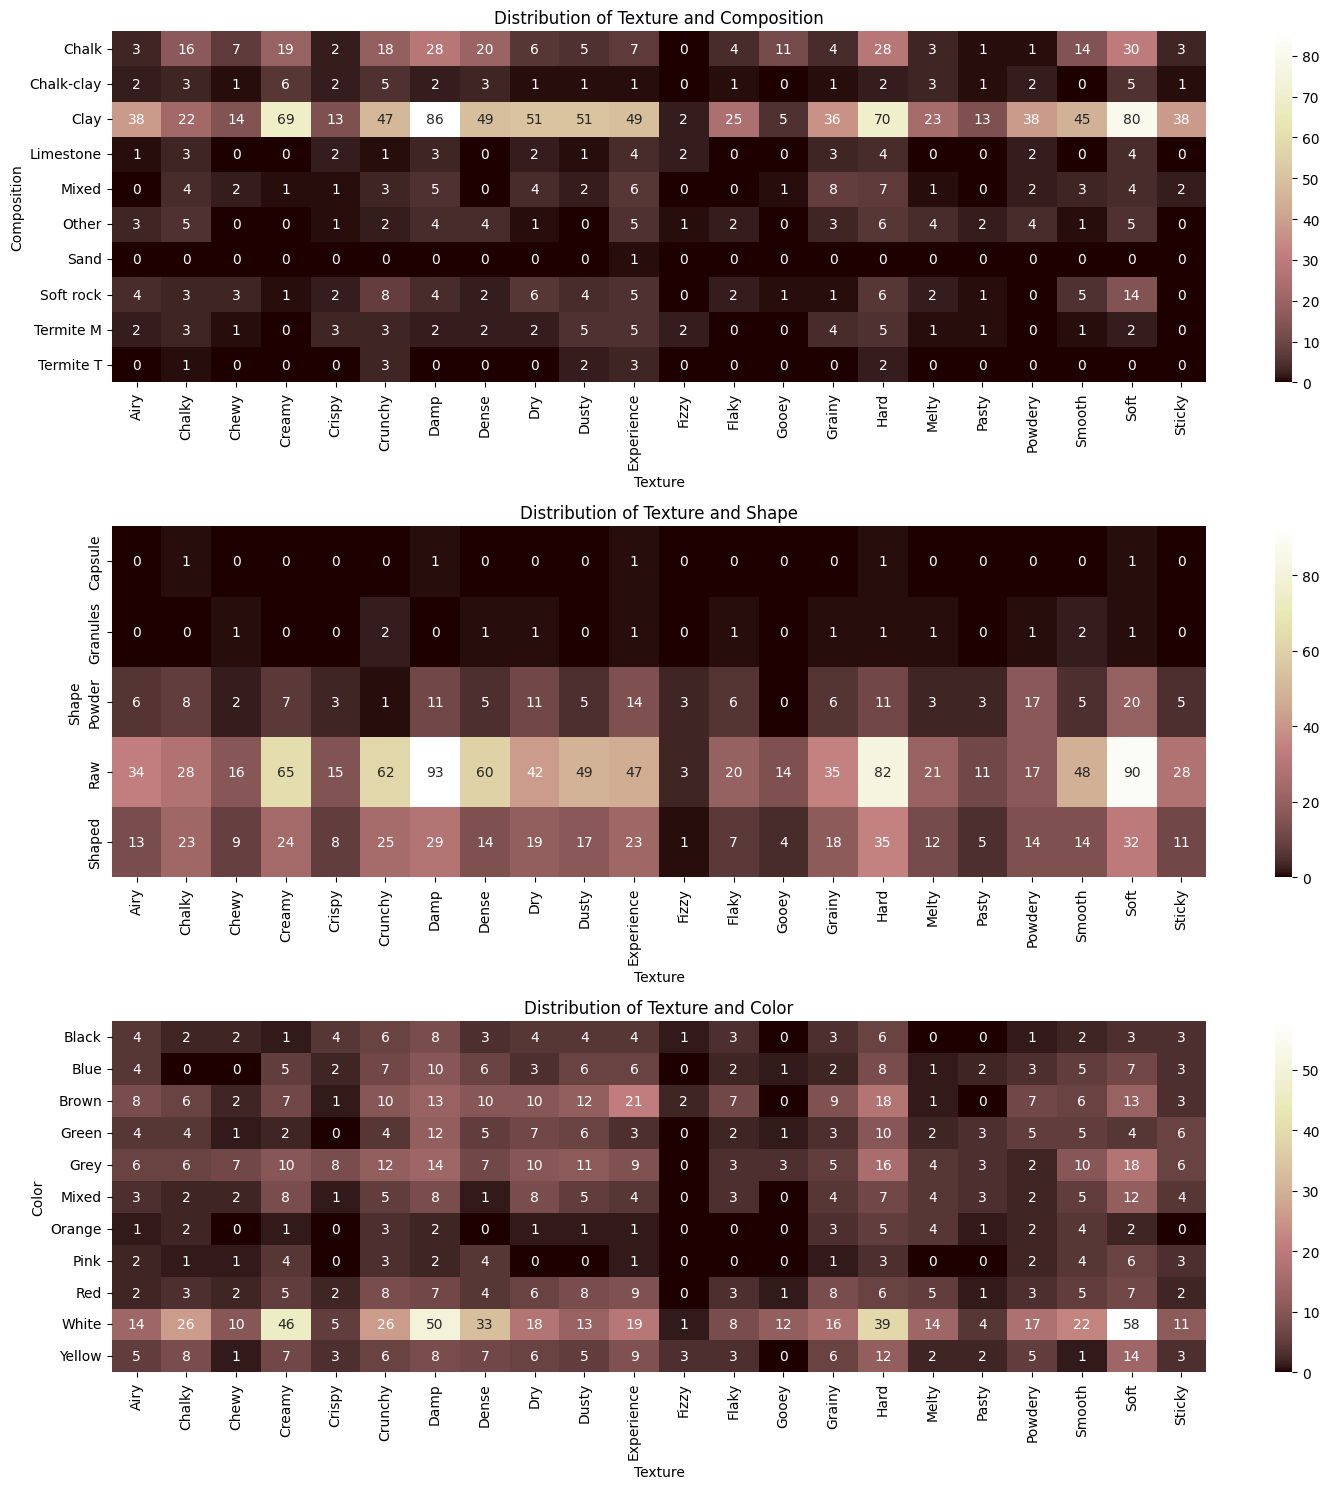

In [ ]:
cross7 = pd.crosstab(df_exploded2['Composition'], df_exploded2['Texture'])
cross8 = pd.crosstab(df_exploded2['Shape'], df_exploded2['Texture'])
cross9 = pd.crosstab(df_exploded2['Color'], df_exploded2['Texture'])

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(15, 15))

ax[0] = sns.heatmap(data = cross7, annot = True, fmt = 'd', cmap = 'pink', ax = ax[0])
ax[0].set_title('Distribution of Texture and Composition')

ax[1] = sns.heatmap(data = cross8, annot = True, fmt = 'd', cmap = 'pink', ax = ax[1])
ax[1].set_title('Distribution of Texture and Shape')

ax[2] = sns.heatmap(data = cross9, annot = True, fmt = 'd', cmap = 'pink', ax = ax[2])
ax[2].set_title('Distribution of Texture and Color')

plt.tight_layout()

plt.show()

**Insights:**

- Taste and Texture are in the same situation regarding their distributions. The distributions are heavily skewed towards the highest number of items in either category, as expected. The following are the 3 most common combinations across the heat maps:

- Texture/Composition: [Clay, Damp], [Clay, Smooth], [Clay, Hard]

- Texture/Shape: [Raw, Damp], [Raw, Soft], [Raw, Hard]

- Texture/Color: [White, Soft], [White, Damp], [White, Creamy]

###**Conclusion:**

The datasets being used are first and foremost collection exhibit data, and therefore must be treated differently from corporate data. the purpose of this data is not profit or prediction driven, but rather meant to help observers better understand the exhibit's contents.

The data for the Museum of Edible Earth is rather small, only consisting of around 700 rows. Because of this it, is difficult to find specific correlations, trends and exceptions. For most aspects of the data, a majority of the correlations will fall in line with the highest distributions with few exceptions. This, however, does not take away the merit of the analysis, as distributions and data restructuring can help observers better understand the exhibit.

For one thing, re-categorizing the raw Taste and Texture data allows people observing the collection exhibit data to get a clearer look at the actual distribution of flavors in geophagic minerals in the exhibit. The original taste and texture data had around 500 unique descriptors, which, while varied and interesting in their own right, were not suitable for data analysis. Reducing them to a set list of 20 Tastes and 20 Textures allows for cleaner visualization and understanding.

Furthermore, one of the things that makes this analysis unique is the focus on places such as Russia and Ukraine. A lot of research shows that geophagy, despite being a global phenomenon, is primarily practiced in the tropics and parts of Africa. An emphasis on geophagic practices in this part of the world offers a unique perspective, and really highlights the fact that geophagy is a global practice, even if infrequent in some regions. Also, since the practitioners of geophagy in the aforementioned regions are small, the insights from this dataset/analysis could actually have real-world value despite the dataset size if one were to further investigate geophagic properties in these regions. However, the dataset may be too small in scope for this purpose, so it should be paired with other datasets to maintain the integrity of any possible results.

Due to the data set's size and nature, a data report may not properly capture the purpose of the project itself. It is data for a collection exhibit after all, so implementing it into the exhibit itself would maximize it's purpose. Therefore, interactive visualizations of the data created in Tableau will be put on the Museum of Edible Earth website. This will allow people to see the data, interact with it, and understand the exhibit in a new way, which will allow deeper understanding of the exhibit itself.